# Subgráficos
Es posible dibujar varios gráficos en un mismo canvas. Esto se logra a través de los subgráficos (o subplots). 
- Cada subgráfico se encontrará en una variable. Con esta yo puedo acceder a los metodos de personalización de ese subgráfico.
- En este momento vamos a diferenciar dos tipos de métodos. **Métodos de Figura**: Alteran propiedades de todo el canvas. **Métodos de Axes**: Alteran propiedades de solamente un subplot.
- Los subgráficos se acomodan en una cuadrícula de dimensiones predefinidas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
# Preprocesamiento de datos
raw = pd.read_csv('../data/tienda_ventas.csv')
raw['fecha'] = raw['date'].apply(lambda x: x[:7])
raw['anio'] = raw['date'].apply(lambda x: x[:4])
df_2016 = raw[(raw['anio'] == '2016') & (raw['family'].isin(['SEAFOOD', 'MEATS', 'DAIRY']))]
agrupacion = df_2016[['fecha', 'family', 'sales']].groupby(['fecha', 'family']).sum()
df2 = agrupacion.reset_index(1) # Para seaborn y plotly
df = agrupacion.unstack() # Para pandas
df.columns = df.columns.droplevel() 

# Pandas

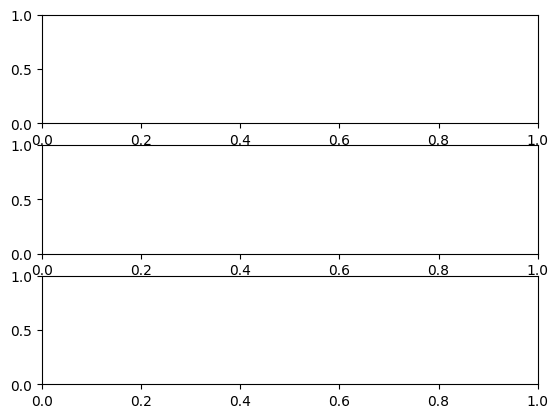

In [8]:
# Subgráficos
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, axes = plt.subplots(3, 1)

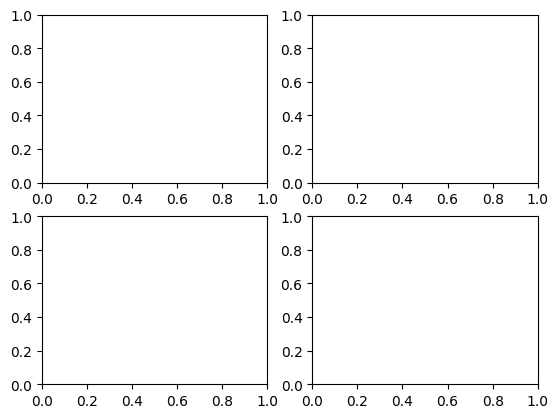

In [9]:
fig, axes = plt.subplots(2, 2)

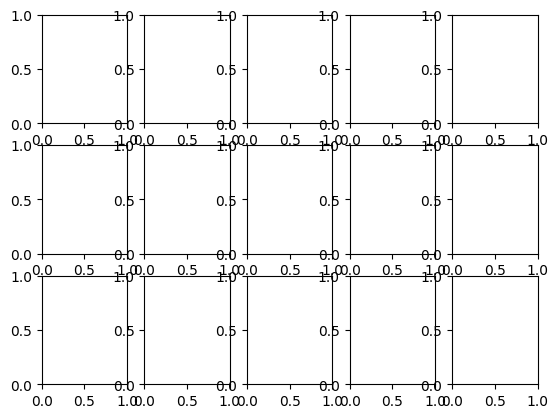

In [14]:
fig, axes = plt.subplots(3, 5)

In [15]:
df

family,DAIRY,MEATS,SEAFOOD
fecha,,,
2016-01,1354875.0,591097.190342,39268.320957
2016-02,1250980.0,544954.455650,37064.826952
2016-03,1411860.0,543454.350060,39254.808992
2016-04,1427146.0,583662.446813,39353.467045
2016-05,1520885.0,591532.731223,40018.643985
2016-06,1373631.0,557547.144229,36849.899012
2016-07,1412688.0,607702.419729,39440.733051
2016-08,1330689.0,568488.623049,39486.651986
2016-09,1360984.0,564988.491109,39019.139987


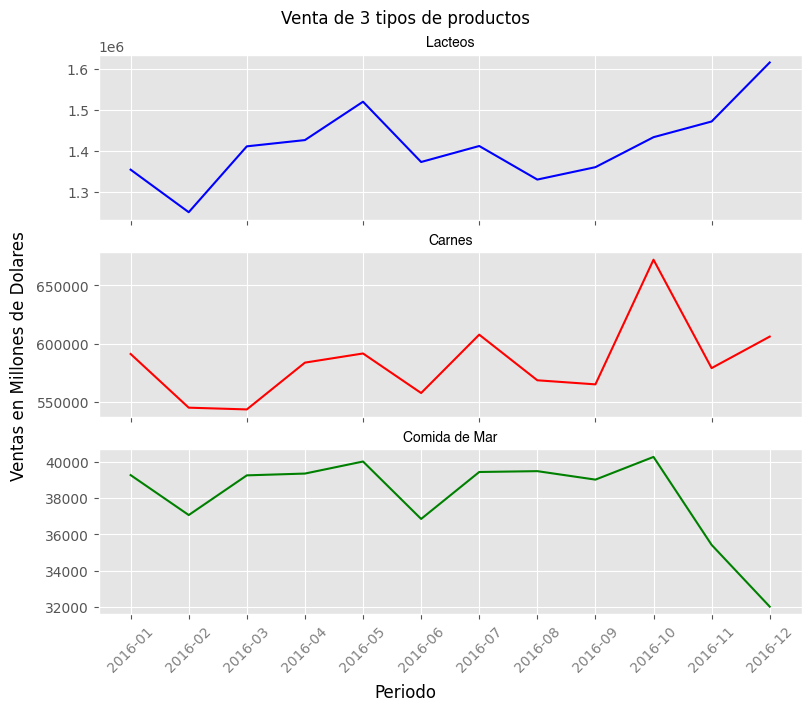

In [71]:
plt.style.use('ggplot')

# Subgráficos
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, ((ax1), (ax2), (ax3)) = plt.subplots(
    3, # Numero de filas
    1, # Numero de Columnas
    constrained_layout=True # Permite que los subgraficos dejen espacio para los titulos y los ejes
)

# Si quisiera un grid 2x2 seria asi:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

fig.set_size_inches(8, 7) # Cambia la manera de definir el tamaño de todo el Canvas
fig.suptitle('Venta de 3 tipos de productos') # Titulo de todo el Canvas
fig.supylabel('Ventas en Millones de Dolares') # Titulo del Eje Y de todo el Canvas
fig.supxlabel('Periodo') # Titulo del Eje X de todo el Canvas

df.plot.line(
    y='DAIRY',
    ax=ax1, # Le digo en que Subplot ira este gráfico
    color='blue'
)

df.plot.line(
    y='MEATS',
    ax=ax2,
    color='red'
)
 
df.plot.line(
    y='SEAFOOD',
    ax=ax3,
    color='green'
)

# Todo se maneja igual a como hemos visto en cada Eje

# Seteo un titulo diferente para cada subplot
ax1.set_title(
    'Lacteos',
    fontdict={
        'size': 10,
        'name': 'Helvetica'
    }
)
ax2.set_title(
    'Carnes',
    fontdict={
        'size': 10,
        'name': 'Helvetica'
    }
)
ax3.set_title(
    'Comida de Mar',
    fontdict={
        'size': 10,
        'name': 'Helvetica'
    }
)

# Solo voy a mostrar los ticks en el ultimo subplot ya que todos los gráficos comparten el Eje X
ax1.set_xticklabels([])
ax2.set_xticklabels([])

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')

ax3.set_xticks(np.arange(0, len(df))) 
ax3.set_xticklabels(
    df.index.values, 
    rotation=45,
    fontdict={
        'color':  'grey',
        'size': 10
    }
)

# Yo ya no necesito leyendas 
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)

plt.show()

# Seaborn

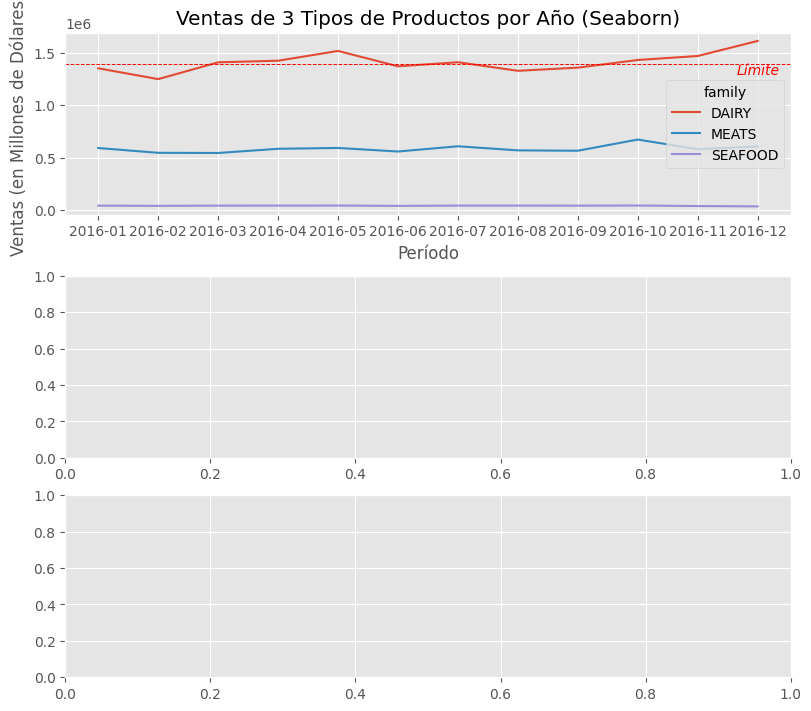

In [79]:
# Subgráficos
# Es exactamente lo mismo!
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, ((ax1), (ax2), (ax3)) = plt.subplots(
    3,
    1, 
    constrained_layout=True
)

fig.set_size_inches(8, 7)

sns.lineplot(
    df2,
    x=df2.index.values,
    y='sales',
    hue='family',
    ax=ax1,
    errorbar=None
)

ax1.set(
    xlabel='Período', 
    ylabel='Ventas (en Millones de Dólares)',
    title='Ventas de 3 Tipos de Productos por Año (Seaborn)'
)

ax1.axhline(
    1400000,
    linestyle='dashed',
    color='red',
    alpha=1,
    linewidth=0.7
)

ax1.annotate(
    'Límite', # El texto
    xy = (11, 1400000),
    xytext = (11, 1400000), 
    size=10, 
    color='red',
    horizontalalignment='center',
    verticalalignment='top',
    fontstyle='italic'
)

plt.show()

# Plotly

In [97]:
# Plotly Express no soporta Subplots a un nivel de personalización como Matplotlib
# Sin embargo, podemos definir subplots automáticamente a partir de una columna con Facet Plots
# https://plotly.com/python/facet-plots/

fig = px.line(
    df2, 
    x=df2.index.values,
    y="sales",
    width=800, 
    height=800,
    template='ggplot2',
    title='Ventas de 3 Tipos de Productos por Año', 
    labels={
        "x": "Periodo",
        "sales": "Ventas",
        "family": "Producto"
    },
    facet_row = 'family' # Crea una fila por cada propiedad diferente en esta columna
    #facet_col = 'family' # Crea una columna por cada propiedad diferente en esta columna
)

fig.show()